In [129]:
import pandas as pd
import numpy as np
import random
from datetime import datetime 
import time
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import math

In [130]:
mat.rcParams['font.family'] = 'NanumGothic'

In [131]:
random.seed(1)


#빈 데이터프레임 만들기
df = pd.DataFrame(columns=['cusno','gender','age','t_num','cusno','region','product','price','quantity','amount','date'])
df.head()

,cusno,gender,age,t_num,cusno,region,product,price,quantity,amount,date


# 고객 데이터


In [132]:
# 고객 데이터 만들기(1,000개)
# 고객번호(랜덤), 성(랜덤), 나이(조작)
random.seed(1)

df_cus = pd.DataFrame(columns=['cusno','gender','age'])

cusno = np.arange(1001,2001)
gender = np.random.choice([0,1],size=1000)

# [나이 age] amount > 20 중가 구매(30~60대, 평균 45) / amount > 30 고가 구매(30~50대, 평균 40)
age1 = np.random.normal(45, 10, size=500)
age1 = np.asarray(age1, dtype = int)

age2 = np.random.normal(40, 10, size=500)
age2 = np.asarray(age1, dtype = int)


#age2 = np.random.normal(40, 20, size=500)
#age2 = np.asarray(age2, dtype = int)

cusno = pd.Series(cusno)
gender = pd.Series(gender)

age1 = pd.Series(age1)
age2= pd.Series(age2)

age = pd.concat([age1,age2],axis=0,ignore_index=True)

df_cus['cusno'] = cusno
df_cus['gender'] = gender
df_cus['age'] = age



df_cus.head()

,cusno,gender,age
0,1001,1,42
1,1002,0,50
2,1003,0,50
3,1004,1,33
4,1005,0,52


In [133]:
df_cus

,cusno,gender,age
0,1001,1,42
1,1002,0,50
2,1003,0,50
3,1004,1,33
4,1005,0,52
...,...,...,...
995,1996,0,47
996,1997,0,41
997,1998,1,37
998,1999,0,29


In [134]:
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cusno   1000 non-null   int32
 1   gender  1000 non-null   int32
 2   age     1000 non-null   int32
dtypes: int32(3)
memory usage: 11.8 KB


In [135]:
df_cus.age.unique()

array([42, 50, 33, 52, 46, 36, 35, 29, 39, 40, 61, 63, 37, 22, 31, 38, 60,
       53, 41, 58, 56, 49, 55, 54, 32, 28, 59, 44, 48, 45, 23, 47, 51, 57,
       34, 19, 43, 14, 27, 66, 30, 62, 69, 21, 26, 24, 64, 20, 67, 10, 68,
        9])

In [136]:
df_cus.age.min()

9

In [137]:
df_cus.age.max()

69

In [138]:
df_cus.age.mean()

44.69

# 거래 데이터

### 지역별 인구 수 참조 (통계청 자료 기반) 가중치 부여(kosis 행정 지역별 인구 분포)

```
1 서울특별시	9,500,480	25.22%
2 부산광역시	3,340,214	8.87%
3 대구광역시	2,378,573	6.31%
4 인천광역시	2,953,260	7.84%
5 광주광역시	1,436,916	3.81%
6 대전광역시	1,449,360	3.85%
7 울산광역시	1,117,204	2.97%
8 세종특별자치시	378,196	1.00%
9 경기도	13,577,808	36.04%
10 강원도	1,539,038	4.09%

```


### 가격대 세팅(단위: 만원) :
    - 저렴 10(~100만원) : 충전기, 전기포트, 멀티탭, 전자레인지, 드라이기...
    - 중렴 20(100~500만원) : 취미(스피커, 커피머신, 사양 좋은 컴퓨터...
    - 고렴 30(500~2000만원) : 대형 가전 냉장고, tv, 세탁기, 건조기, 에어컨, 안마의자...

### 판매수량 세팅 : 
 - 구매수량 조정(저가:1 ~ 20개, 중가:1 ~ 10개, 고가:1 ~ 5개)

### 구매일 빈도수 설정
- 월별(시즌) amount 가중치 부여
    - 1~3월 / 신학기 할인 → 매출 증가
    - 5~9월 / 에어컨 → 매출 증가

In [142]:
#거래 데이터프레임 만들기(10,000개)
random.seed(1)

df_tra = pd.DataFrame(columns=['t_num','cusno','region','product','price','quantity','amount','date'])

t_num = random.sample(list(range(10000,50000)),10000)
cusno = np.random.randint(1001,2001,size=10000)

t_num = pd.Series(t_num)
cusno = pd.Series(cusno)

df_tra['t_num'] = t_num
df_tra['cusno'] = cusno

# [지역 region] 지역별 인구 분포 /지역 세팅
region1 = np.random.randint(1,2,size=2522)
region2 = np.random.randint(2,3,size=887)
region3 = np.random.randint(3,4,size=631)
region4 = np.random.randint(4,5,size=784)
region5 = np.random.randint(5,6,size=381)
region6 = np.random.randint(6,7,size=385)
region7 = np.random.randint(7,8,size=297)
region8 = np.random.randint(8,9,size=100)
region9 = np.random.randint(9,10,size=3604)
region10 = np.random.randint(10,11,size=409)

a1 = pd.Series(region1)
a2 = pd.Series(region2)
a3 = pd.Series(region3)
a4 = pd.Series(region4)
a5 = pd.Series(region5)
a6 = pd.Series(region6)
a7 = pd.Series(region7)
a8 = pd.Series(region8)
a9 = pd.Series(region9)
a10 = pd.Series(region10)

region = region.sample(frac=1).reset_index(drop=True)
df_tra['region'] = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10],axis=0,ignore_index=True)



# product 제품 중고가 수량 설정
p10 = np.random.randint(10,11,size=6000)
p20 = np.random.randint(20,21,size=3000)
p30 = np.random.randint(30,31,size=1000)

product10 = pd.Series(p10)
product20 = pd.Series(p20)
product30 = pd.Series(p30)

product = pd.concat([product10,product20,product30],axis=0,ignore_index=True) #행으로 이어 붙이기
df_tra['product'] = product.sample(frac=1).reset_index(drop=True) # 랜덤 섞어주기

# price,quantity,amount 초기값 랜덤 설정
price = np.random.uniform(1000,50000,size=10000).round(2)
quantity = np.random.randint(1,100,size=10000)
amount = price*quantity

# 가격대 조정
def price_set(x):
    if x == 10: 
        y = np.random.randint(1,101)
    elif x == 20:
        y = np.random.randint(100,501)
    elif x == 30: 
        y = np.random.randint(500,2001)
    return y

# 구매수량 조정(저가:1~20개, 중가:1~10개, 고가:1~5개)
def quantity_set(x):
    if x == 10: 
        z = np.random.randint(1,21)
    elif x == 20:
        z = np.random.randint(1,11)
    elif x == 30: 
        z = np.random.randint(1,6)
    return z

# 함수 적용
df_tra['price']=df_tra['product'].apply(price_set)
df_tra['quantity']=df_tra['product'].apply(quantity_set)


#amount 조정
df_tra['amount']=df_tra['price']*df_tra['quantity']



# [날짜 date 구매한 날짜]
'''1. 월별(시즌) amount 가중치 부여
    - 1~3월 / 신학기 할인 → 매출 증가
    - 5~9월 / 에어컨 → 매출 증가'''


# 20년도 조정
date_list20_1 = list(pd.date_range('2020-01-01','2020-03-31',freq='D'))
date_list20_1 = np.random.choice(date_list20_1,size=1500)
date_list20_1 = pd.Series(date_list20_1)

date_list20_2 = list(pd.date_range('2020-04-01','2020-04-30',freq='D'))
date_list20_2 = np.random.choice(date_list20_2,size=100)
date_list20_2 = pd.Series(date_list20_2)

date_list20_3 = list(pd.date_range('2020-05-01','2020-09-30',freq='D'))
date_list20_3 = np.random.choice(date_list20_3,size=2500)
date_list20_3 = pd.Series(date_list20_3)

date_list20_4 = list(pd.date_range('2020-10-01','2020-12-31',freq='D'))
date_list20_4 = np.random.choice(date_list20_4,size=900)
date_list20_4 = pd.Series(date_list20_4)

#21년도 조정
date_list21_1 = list(pd.date_range('2021-01-01','2021-03-31',freq='D'))
date_list21_1 = np.random.choice(date_list21_1,size=1500)
date_list21_1 = pd.Series(date_list21_1)

date_list21_2 = list(pd.date_range('2021-04-01','2021-04-30',freq='D'))
date_list21_2 = np.random.choice(date_list21_2,size=100)
date_list21_2 = pd.Series(date_list21_2)

date_list21_3 = list(pd.date_range('2021-05-01','2021-09-30',freq='D'))
date_list21_3 = np.random.choice(date_list21_3,size=2500)
date_list21_3 = pd.Series(date_list21_3)

date_list21_4 = list(pd.date_range('2021-10-01','2021-12-31',freq='D'))
date_list21_4 = np.random.choice(date_list21_4,size=900)
date_list21_4 = pd.Series(date_list21_4)


# date = date.sample(frac=1).reset_index(drop=True)

df_tra['date'] = pd.concat([date_list20_1,date_list20_2,date_list20_3,date_list20_4,
                 date_list21_1,date_list21_2,date_list21_3,date_list21_4],axis=0,ignore_index=True)


In [141]:
df

,cusno,gender,age,t_num,cusno,region,product,price,quantity,amount,date


In [150]:
df_tra.loc[df_tra.cusno = '1001','date']


SyntaxError: invalid syntax (30377481.py, line 1)

In [117]:
df_tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   t_num     10000 non-null  int64         
 1   cusno     10000 non-null  int32         
 2   region    10000 non-null  int32         
 3   product   10000 non-null  int32         
 4   price     10000 non-null  int64         
 5   quantity  10000 non-null  int64         
 6   amount    10000 non-null  int64         
 7   date      10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(3), int64(4)
memory usage: 507.9 KB


# 고객 + 거래 데이터 병합

In [152]:
#데이터프레임 통합: 공통 변수 cusno를 활용해 데이터 결합
df = df_cus.merge(df_tra,on='cusno',how='outer')
df.index = df.index +1
df.head(10)

,cusno,gender,age,t_num,region,product,price,quantity,amount,date
1,1001,1,42,47515,1,10,51,1,51,2020-07-23
2,1001,1,42,32098,1,30,1855,5,9275,2020-08-25
3,1001,1,42,42031,2,10,17,10,170,2020-05-06
4,1001,1,42,14178,4,10,56,8,448,2020-12-20
5,1001,1,42,12165,6,10,20,1,20,2021-01-08
6,1001,1,42,29553,7,30,1822,4,7288,2021-01-12
7,1001,1,42,35238,9,10,86,4,344,2021-06-12
8,1002,0,50,10374,1,10,26,10,260,2020-01-11
9,1002,0,50,35933,1,10,45,12,540,2020-03-28
10,1002,0,50,38383,1,20,113,2,226,2020-06-13


In [153]:
df

,cusno,gender,age,t_num,region,product,price,quantity,amount,date
1,1001,1,42,47515,1,10,51,1,51,2020-07-23
2,1001,1,42,32098,1,30,1855,5,9275,2020-08-25
3,1001,1,42,42031,2,10,17,10,170,2020-05-06
4,1001,1,42,14178,4,10,56,8,448,2020-12-20
5,1001,1,42,12165,6,10,20,1,20,2021-01-08
...,...,...,...,...,...,...,...,...,...,...
9996,2000,0,29,44428,9,10,20,5,100,2021-05-02
9997,2000,0,29,48975,9,10,16,4,64,2021-07-06
9998,2000,0,29,25963,9,10,79,8,632,2021-06-29
9999,2000,0,29,39093,9,30,668,1,668,2021-09-14


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   cusno     10000 non-null  int32         
 1   gender    10000 non-null  int32         
 2   age       10000 non-null  int32         
 3   t_num     10000 non-null  int64         
 4   region    10000 non-null  int32         
 5   product   10000 non-null  int32         
 6   price     10000 non-null  int64         
 7   quantity  10000 non-null  int64         
 8   amount    10000 non-null  int64         
 9   date      10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(5), int64(4)
memory usage: 664.1 KB


# 데이터 전처리

### 나이대별 카테고리 설정

In [154]:
# 나이대 카테고리 설정
def category(x):
    age = (x//10)*10
    return age

df['age_category']=df.age.apply(category)
df

,cusno,gender,age,t_num,region,product,price,quantity,amount,date,age_category
1,1001,1,42,47515,1,10,51,1,51,2020-07-23,40
2,1001,1,42,32098,1,30,1855,5,9275,2020-08-25,40
3,1001,1,42,42031,2,10,17,10,170,2020-05-06,40
4,1001,1,42,14178,4,10,56,8,448,2020-12-20,40
5,1001,1,42,12165,6,10,20,1,20,2021-01-08,40
...,...,...,...,...,...,...,...,...,...,...,...
9996,2000,0,29,44428,9,10,20,5,100,2021-05-02,20
9997,2000,0,29,48975,9,10,16,4,64,2021-07-06,20
9998,2000,0,29,25963,9,10,79,8,632,2021-06-29,20
9999,2000,0,29,39093,9,30,668,1,668,2021-09-14,20


### 컬럼 순서 변경(t_num기준)

In [155]:
df = df[['t_num','cusno','gender','age','age_category','region','product','price','quantity','amount','date']]
df

,t_num,cusno,gender,age,age_category,region,product,price,quantity,amount,date
1,47515,1001,1,42,40,1,10,51,1,51,2020-07-23
2,32098,1001,1,42,40,1,30,1855,5,9275,2020-08-25
3,42031,1001,1,42,40,2,10,17,10,170,2020-05-06
4,14178,1001,1,42,40,4,10,56,8,448,2020-12-20
5,12165,1001,1,42,40,6,10,20,1,20,2021-01-08
...,...,...,...,...,...,...,...,...,...,...,...
9996,44428,2000,0,29,20,9,10,20,5,100,2021-05-02
9997,48975,2000,0,29,20,9,10,16,4,64,2021-07-06
9998,25963,2000,0,29,20,9,10,79,8,632,2021-06-29
9999,39093,2000,0,29,20,9,30,668,1,668,2021-09-14


### 판매 년-월 매치

In [197]:
def extract_ym(date):
    year = str(date.year)
    month = date.month
    
    if month<10:
        month = '0'+ str(month)
        
    return year + str(month)

df['date_ym'] = df.date.apply(extract_ym)
df

,t_num,cusno,gender,age,age_category,region,product,price,quantity,amount,date,year,month,day,amount_20,amount_21,sales,date_ym
0,10348,1926,0,68,60,1,10,11,11,121,2020-01-01,2020,2020-01,2020-01-01,121.0,NaN,25443,202001
1,31564,1770,0,61,60,1,30,1889,1,1889,2020-01-01,2020,2020-01,2020-01-01,1889.0,NaN,25443,202001
2,33109,1183,1,47,40,1,10,95,19,1805,2020-01-01,2020,2020-01,2020-01-01,1805.0,NaN,25443,202001
3,22283,1638,1,44,40,1,20,209,10,2090,2020-01-01,2020,2020-01,2020-01-01,2090.0,NaN,25443,202001
4,46238,1346,1,53,50,1,20,337,8,2696,2020-01-01,2020,2020-01,2020-01-01,2696.0,NaN,25443,202001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14583,1212,1,50,50,10,20,200,4,800,2021-12-31,2021,2021-12,2021-12-31,NaN,800.0,25443,202112
9996,31789,1641,1,47,40,10,10,88,20,1760,2021-12-31,2021,2021-12,2021-12-31,NaN,1760.0,25443,202112
9997,28811,1044,0,37,30,9,10,86,18,1548,2021-12-31,2021,2021-12,2021-12-31,NaN,1548.0,25443,202112
9998,23910,1745,0,33,30,9,20,201,3,603,2021-12-31,2021,2021-12,2021-12-31,NaN,603.0,25443,202112


In [156]:
#데이터 순서를 날짜, 시간으로 정렬

df=df.sort_values(['date'],ignore_index=True)  #인덱스 무시
df.head()

,t_num,cusno,gender,age,age_category,region,product,price,quantity,amount,date
0,10348,1926,0,68,60,1,10,11,11,121,2020-01-01
1,31564,1770,0,61,60,1,30,1889,1,1889,2020-01-01
2,33109,1183,1,47,40,1,10,95,19,1805,2020-01-01
3,22283,1638,1,44,40,1,20,209,10,2090,2020-01-01
4,46238,1346,1,53,50,1,20,337,8,2696,2020-01-01


## 데이터 요약 및 분석

In [125]:
df.describe()

,t_num,cusno,gender,age,age_category,region,product,price,quantity,amount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,30083.791700,1502.180400,0.508300,43.979900,39.557000,5.294500,15.000000,243.57720,8.252700,1165.378200
std,11554.581256,289.358105,0.499956,9.526204,9.993185,3.480658,6.708539,381.09369,5.549407,1386.183925
min,10003.000000,1001.000000,0.000000,14.000000,10.000000,1.000000,10.000000,1.00000,1.000000,1.000000
25%,20112.750000,1251.750000,0.000000,37.000000,30.000000,1.000000,10.000000,42.00000,4.000000,286.000000
50%,30082.500000,1505.000000,1.000000,44.000000,40.000000,5.000000,10.000000,83.50000,7.000000,720.000000
75%,40034.000000,1753.000000,1.000000,51.000000,50.000000,9.000000,20.000000,298.00000,12.000000,1450.000000
max,49998.000000,2000.000000,1.000000,73.000000,70.000000,10.000000,30.000000,1996.00000,20.000000,9940.000000


- 성별 분포 균일
- 나이 평균 45세 / 최연소: 10세 / 최고령: 76세
- 가격 평균 247만원 / 최저가: 1만원 / 최고가: 2000만원
- 구매량 평균 8개 / 최저: 1개 / 최고: 20개
- 구매액 평균 1202만원 / 최저: 1만원 / 최고: 9915만원

In [126]:
df.corr()

,t_num,cusno,gender,age,age_category,region,product,price,quantity,amount
t_num,1.000000,0.009118,-0.024370,0.008224,0.009979,-0.011014,-0.003523,-0.004727,0.002848,0.001223
cusno,0.009118,1.000000,-0.003132,-0.008988,-0.008550,-0.013033,0.016024,0.010971,-0.016257,0.004969
gender,-0.024370,-0.003132,1.000000,0.010188,0.003639,0.004314,-0.001640,-0.001200,0.000055,-0.001594
age,0.008224,-0.008988,0.010188,1.000000,0.959202,-0.001260,-0.001009,-0.002202,0.011279,0.014578
age_category,0.009979,-0.008550,0.003639,0.959202,1.000000,0.005390,-0.000820,-0.000122,0.008024,0.010991
region,-0.011014,-0.013033,0.004314,-0.001260,0.005390,1.000000,0.011843,-0.004258,-0.005603,0.007834
product,-0.003523,0.016024,-0.001640,-0.001009,-0.000820,0.011843,1.000000,0.843510,-0.511072,0.684526
price,-0.004727,0.010971,-0.001200,-0.002202,-0.000122,-0.004258,0.843510,1.000000,-0.399498,0.785737
quantity,0.002848,-0.016257,0.000055,0.011279,0.008024,-0.005603,-0.511072,-0.399498,1.000000,-0.087600
amount,0.001223,0.004969,-0.001594,0.014578,0.010991,0.007834,0.684526,0.785737,-0.087600,1.000000


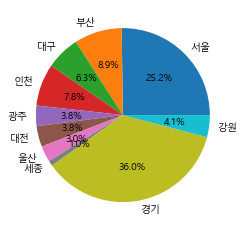

In [73]:
# 지역별 고객

plt.rcParams['font.family'] = 'Malgun Gothic'

values = [2522, 887, 631, 784, 381, 385, 297, 100, 3604, 409]
labels = ['서울','부산','대구','인천','광주','대전','울산','세종','경기','강원']


plt.pie(values, labels=labels, autopct='%.1f%%')

plt.show()

In [70]:
df.to_csv('df.csv')
df1 = pd.read_csv('df.csv')
df1 = df1.drop('Unnamed: 0', axis=1)
df1

,t_num,cusno,gender,age,age_category,region,product,price,quantity,amount,date,date_ym
0,37663,1238,1,47,40,1,10,43,9,387,2020-01-01,202001
1,34420,1862,1,60,60,1,10,60,2,120,2020-01-01,202001
2,20111,1637,0,37,30,1,20,260,9,2340,2020-01-01,202001
3,40250,1880,1,36,30,1,20,324,5,1620,2020-01-01,202001
4,45996,1597,1,51,50,1,10,6,18,108,2020-01-01,202001
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,48318,1541,0,32,30,9,30,1052,3,3156,2021-12-31,202112
9996,33927,1016,1,52,50,10,10,36,11,396,2021-12-31,202112
9997,28944,1412,1,43,40,9,20,143,2,286,2021-12-31,202112
9998,24169,1560,0,42,40,9,20,177,5,885,2021-12-31,202112


In [71]:
data = df1[['age','product','price','quantity','amount']]
trans_data = np.log(data).diff().dropna()
trans_data

,age,product,price,quantity,amount
1,0.244197,0.000000,0.333144,-1.504077,-1.170933
2,-0.483427,0.693147,1.466337,1.504077,2.970414
3,-0.027399,0.000000,0.220062,-0.587787,-0.367725
4,0.348307,-0.693147,-3.988984,1.280934,-2.708050
5,-0.405465,0.000000,2.470920,-1.791759,0.679161
...,...,...,...,...,...
9995,-0.223144,1.098612,3.066628,-1.673976,1.392652
9996,0.485508,-1.098612,-3.374929,1.299283,-2.075646
9997,-0.190044,0.693147,1.379326,-1.704748,-0.325422
9998,-0.023530,0.000000,0.213305,0.916291,1.129596


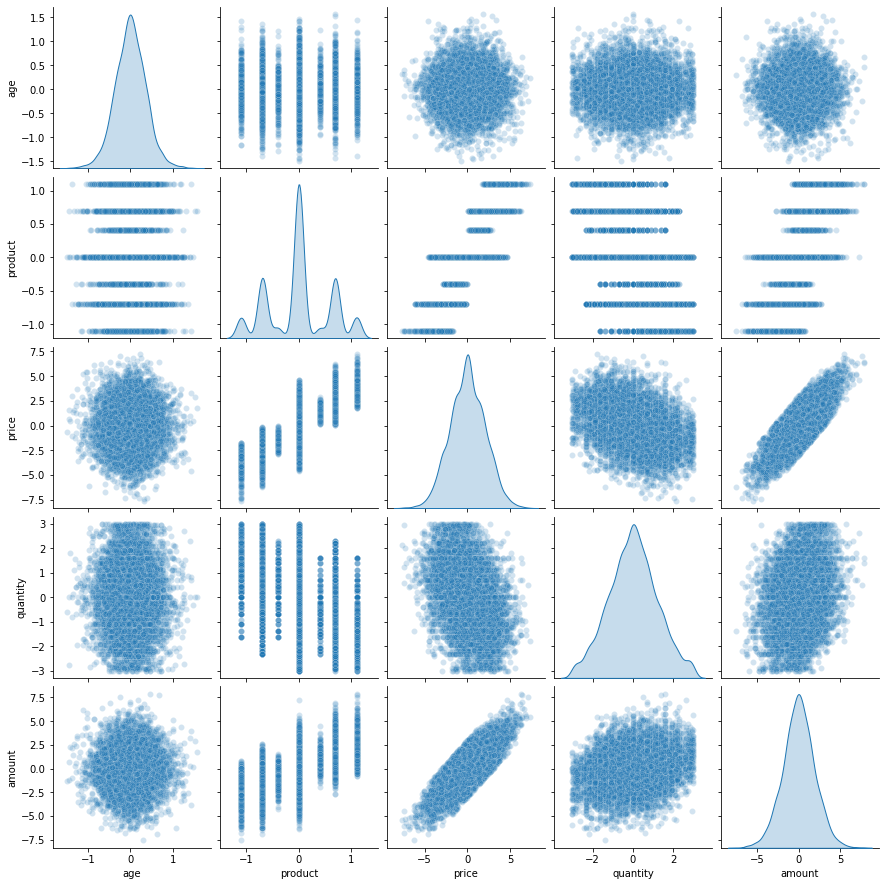

In [72]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2})

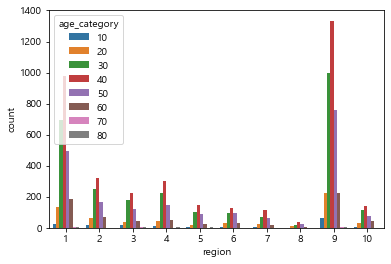

In [75]:
# 지역, 연령대 분포

sns.countplot(x='region', hue = 'age_category', data=df)
plt.show()

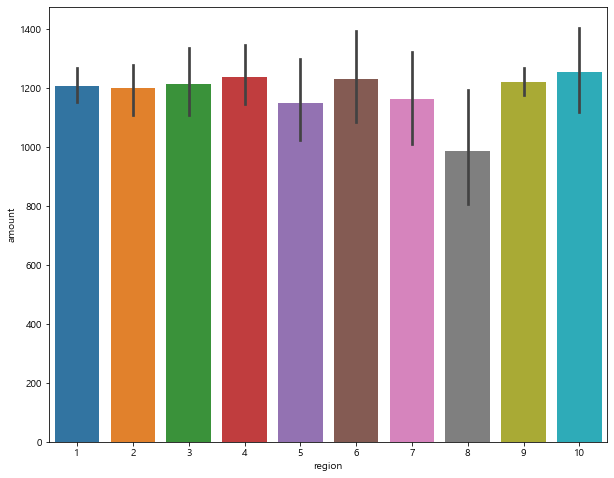

In [193]:
# 지역별 매출 추이

sns.barplot(x="region", y="amount", data = df)
plt.show()

In [104]:
df

,t_num,cusno,gender,age,age_category,region,product,price,quantity,amount,date,date_ym,year,month,day,year_20,year_21,amount_20,amount_21
0,37663,1238,1,47,40,1,10,43,9,387,2020-01-01,202001,2020,2020-01,2020-01-01,2020,NaT,387.0,NaN
1,34420,1862,1,60,60,1,10,60,2,120,2020-01-01,202001,2020,2020-01,2020-01-01,2020,NaT,120.0,NaN
2,20111,1637,0,37,30,1,20,260,9,2340,2020-01-01,202001,2020,2020-01,2020-01-01,2020,NaT,2340.0,NaN
3,40250,1880,1,36,30,1,20,324,5,1620,2020-01-01,202001,2020,2020-01,2020-01-01,2020,NaT,1620.0,NaN
4,45996,1597,1,51,50,1,10,6,18,108,2020-01-01,202001,2020,2020-01,2020-01-01,2020,NaT,108.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,48318,1541,0,32,30,9,30,1052,3,3156,2021-12-31,202112,2021,2021-12,2021-12-31,NaT,2021,NaN,3156.0
9996,33927,1016,1,52,50,10,10,36,11,396,2021-12-31,202112,2021,2021-12,2021-12-31,NaT,2021,NaN,396.0
9997,28944,1412,1,43,40,9,20,143,2,286,2021-12-31,202112,2021,2021-12,2021-12-31,NaT,2021,NaN,286.0
9998,24169,1560,0,42,40,9,20,177,5,885,2021-12-31,202112,2021,2021-12,2021-12-31,NaT,2021,NaN,885.0


In [159]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.to_period(freq = 'Y')
df['month'] = df['date'].dt.to_period(freq = 'M')
df['day'] = df['date'].dt.to_period(freq = 'D')

df

,t_num,cusno,gender,age,age_category,region,product,price,quantity,amount,date,year,month,day
0,10348,1926,0,68,60,1,10,11,11,121,2020-01-01,2020,2020-01,2020-01-01
1,31564,1770,0,61,60,1,30,1889,1,1889,2020-01-01,2020,2020-01,2020-01-01
2,33109,1183,1,47,40,1,10,95,19,1805,2020-01-01,2020,2020-01,2020-01-01
3,22283,1638,1,44,40,1,20,209,10,2090,2020-01-01,2020,2020-01,2020-01-01
4,46238,1346,1,53,50,1,20,337,8,2696,2020-01-01,2020,2020-01,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14583,1212,1,50,50,10,20,200,4,800,2021-12-31,2021,2021-12,2021-12-31
9996,31789,1641,1,47,40,10,10,88,20,1760,2021-12-31,2021,2021-12,2021-12-31
9997,28811,1044,0,37,30,9,10,86,18,1548,2021-12-31,2021,2021-12,2021-12-31
9998,23910,1745,0,33,30,9,20,201,3,603,2021-12-31,2021,2021-12,2021-12-31


In [163]:
# df['amount_20'] = df.loc[df['year']=='2020','amount']
# df['amount_21'] = df.loc[df['year']=='2021','amount']
# df

df['sales'] = df.loc[df['year']=='2021','amount'].sum() - df.loc[df['year']=='2020','amount'].sum()
df

,t_num,cusno,gender,age,age_category,region,product,price,quantity,amount,date,year,month,day,amount_20,amount_21,sales
0,10348,1926,0,68,60,1,10,11,11,121,2020-01-01,2020,2020-01,2020-01-01,121.0,NaN,25443
1,31564,1770,0,61,60,1,30,1889,1,1889,2020-01-01,2020,2020-01,2020-01-01,1889.0,NaN,25443
2,33109,1183,1,47,40,1,10,95,19,1805,2020-01-01,2020,2020-01,2020-01-01,1805.0,NaN,25443
3,22283,1638,1,44,40,1,20,209,10,2090,2020-01-01,2020,2020-01,2020-01-01,2090.0,NaN,25443
4,46238,1346,1,53,50,1,20,337,8,2696,2020-01-01,2020,2020-01,2020-01-01,2696.0,NaN,25443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14583,1212,1,50,50,10,20,200,4,800,2021-12-31,2021,2021-12,2021-12-31,NaN,800.0,25443
9996,31789,1641,1,47,40,10,10,88,20,1760,2021-12-31,2021,2021-12,2021-12-31,NaN,1760.0,25443
9997,28811,1044,0,37,30,9,10,86,18,1548,2021-12-31,2021,2021-12,2021-12-31,NaN,1548.0,25443
9998,23910,1745,0,33,30,9,20,201,3,603,2021-12-31,2021,2021-12,2021-12-31,NaN,603.0,25443


In [268]:
# 고객 넘버로 인덱스 변경, 정렬해줌
df_cus = df.set_index(['cusno','year'])
df_cus.sort_values(['cusno'])

t_num  gender  age  age_category  region  product  price  \
cusno year                                                             
1001  2020  42031       1   42            40       2       10     17   
      2020  47515       1   42            40       1       10     51   
      2021  12165       1   42            40       6       10     20   
      2021  35238       1   42            40       9       10     86   
      2020  32098       1   42            40       1       30   1855   
...           ...     ...  ...           ...     ...      ...    ...   
2000  2020  32148       0   29            20       2       10     69   
      2020  42323       0   29            20       2       20    377   
      2021  48975       0   29            20       9       10     16   
      2021  25963       0   29            20       9       10     79   
      2020  32684       0   29            20       3       10     82   

            quantity  amount       date    month         day  amount_20  \
cusno year                                                                
1001  2020        10     170 2020-05-06  2020-05  2020-05-06      170.0   
      2020         1      51 2020-07-23  2020-07  2020-07-23       51.0   
      2021         1      20 2021-01-08  2021-01  2021-01-08        NaN   
      2021         4     344 2021-06-12  2021-06  2021-06-12        NaN   
      2020         5    9275 2020-08-25  2020-08  2020-08-25     9275.0   
...              ...     ...        ...      ...         ...        ...   
2000  2020         8     552 2020-06-29  2020-06  2020-06-29      552.0   
      2020         5    1885 2020-09-17  2020-09  2020-09-17     1885.0   
      2021         4      64 2021-07-06  2021-07  2021-07-06        NaN   
      2021         8     632 2021-06-29  2021-06  2021-06-29        NaN   
      2020        10     820 2020-08-20  2020-08  2020-08-20      820.0   

            amount_21  sales date_ym  amount20_cusno  cusno_amount20  
cusno year                                                            
1001  2020        NaN  25443  202005         6043567            8116  
      2020        NaN  25443  202007         6043567            8116  
      2021       20.0  25443  202101         6043567            8116  
      2021      344.0  25443  202106         6043567            8116  
      2020        NaN  25443  202008         6043567            8116  
...               ...    ...     ...             ...             ...  
2000  2020        NaN  25443  202006         6043567            8116  
      2020        NaN  25443  202009         6043567            8116  
      2021       64.0  25443  202107         6043567            8116  
      2021      632.0  25443  202106         6043567            8116  
      2020        NaN  25443  202008         6043567            8116  

[10000 rows x 18 columns]

In [272]:
df_cus = df_cus['year']=='2021','amount'.sum - df_cus['year']=='2020','amount'.sum()
df_cus

KeyError: 'year'

In [ ]:
df['sales'] = df.loc[df['year']=='2021','amount'].sum() - df.loc[df['year']=='2020','amount'].sum()
df

In [264]:
for i in range(1000,2001):
    df['cusno_amount20'] = df.loc[(df['year']=='2020')&(df['cusno']==i),'amount'].sum()
df

,t_num,cusno,gender,age,age_category,region,product,price,quantity,amount,date,year,month,day,amount_20,amount_21,sales,date_ym,amount20_cusno,cusno_amount20
0,10348,1926,0,68,60,1,10,11,11,121,2020-01-01,2020,2020-01,2020-01-01,121.0,NaN,25443,202001,6043567,8116
1,31564,1770,0,61,60,1,30,1889,1,1889,2020-01-01,2020,2020-01,2020-01-01,1889.0,NaN,25443,202001,6043567,8116
2,33109,1183,1,47,40,1,10,95,19,1805,2020-01-01,2020,2020-01,2020-01-01,1805.0,NaN,25443,202001,6043567,8116
3,22283,1638,1,44,40,1,20,209,10,2090,2020-01-01,2020,2020-01,2020-01-01,2090.0,NaN,25443,202001,6043567,8116
4,46238,1346,1,53,50,1,20,337,8,2696,2020-01-01,2020,2020-01,2020-01-01,2696.0,NaN,25443,202001,6043567,8116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14583,1212,1,50,50,10,20,200,4,800,2021-12-31,2021,2021-12,2021-12-31,NaN,800.0,25443,202112,6043567,8116
9996,31789,1641,1,47,40,10,10,88,20,1760,2021-12-31,2021,2021-12,2021-12-31,NaN,1760.0,25443,202112,6043567,8116
9997,28811,1044,0,37,30,9,10,86,18,1548,2021-12-31,2021,2021-12,2021-12-31,NaN,1548.0,25443,202112,6043567,8116
9998,23910,1745,0,33,30,9,20,201,3,603,2021-12-31,2021,2021-12,2021-12-31,NaN,603.0,25443,202112,6043567,8116


In [265]:
df['cusno_amount20'].unique()

array([8116], dtype=int64)

In [283]:
df_amount = df.groupby(["year","cusno"]).agg({"amount_20":"sum","amount_21":"sum"})
df_amount

amount_20  amount_21
year cusno                      
2020 1001      9944.0        0.0
     1002      2343.0        0.0
     1003      5746.0        0.0
     1004      8073.0        0.0
     1005      5734.0        0.0
...               ...        ...
2021 1996         0.0     9359.0
     1997         0.0    13767.0
     1998         0.0      908.0
     1999         0.0     8757.0
     2000         0.0     5468.0

[1989 rows x 2 columns]

In [284]:
df_amount.loc['2021'] - df_amount.loc['2020']

,amount_20,amount_21
cusno,,
1001,-9944.0,7652.0
1002,-2343.0,6537.0
1003,-5746.0,8743.0
1004,-8073.0,14079.0
1005,-5734.0,6029.0
...,...,...
1996,-7343.0,9359.0
1997,-4044.0,13767.0
1998,-9056.0,908.0


In [285]:
df.amount_21.value - df.amount_20.value

AttributeError: 'Series' object has no attribute 'value'

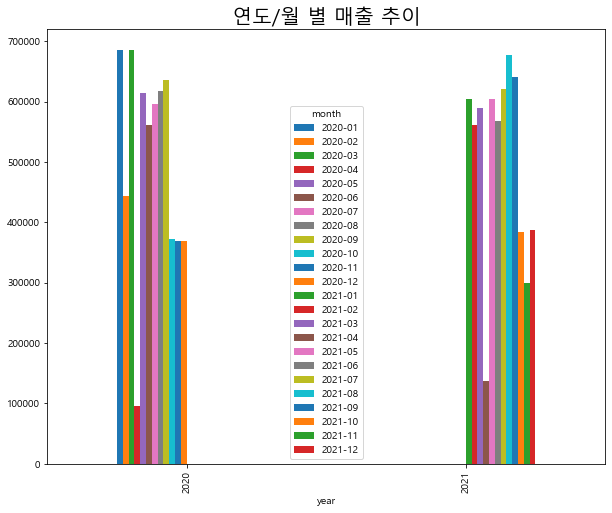

In [173]:
df_groupby_year = df.groupby(['year','month'])
df_groupby_year['amount'].sum().unstack().plot.bar()

mat.rcParams['font.family'] = 'Malgun Gothic'

plt.title('연도/월 별 매출 추이', size=20)
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

### 지역에 따른 매출

<AxesSubplot:xlabel='region', ylabel='amount'>

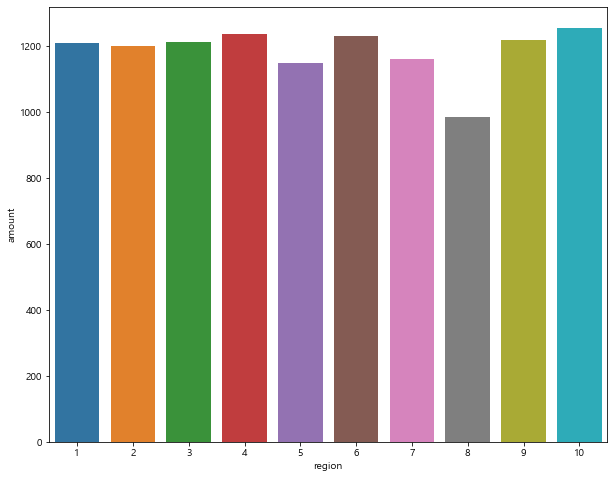

In [195]:
# 8번 지역이 매출이 가장 낮음
sns.barplot(data=df,x='region',y='amount', ci=None)

<AxesSubplot:xlabel='date_ym', ylabel='amount'>

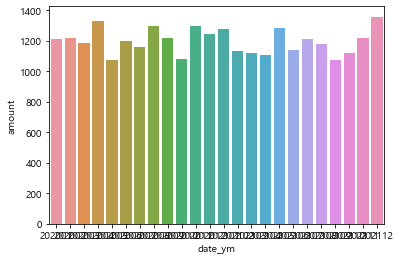

In [74]:
sns.barplot(data=df,x='date_ym',y='amount', ci=None)

In [199]:
df_yd_am = df.groupby('date_ym').mean()
df_yd_am = df_yd_am.drop(['t_num','cusno','gender','age','age_category','region','product','price','quantity','amount_20','amount_21','sales','date','year','month','day'],axis=1)
df_yd_am

,amount
date_ym,
202001,1331.968932
202002,1025.048499
202003,1241.182971
202004,954.120000
202005,1246.277890
202006,1162.356108
202007,1219.130879
202008,1193.437137
202009,1227.411197


<AxesSubplot:xlabel='date_ym'>

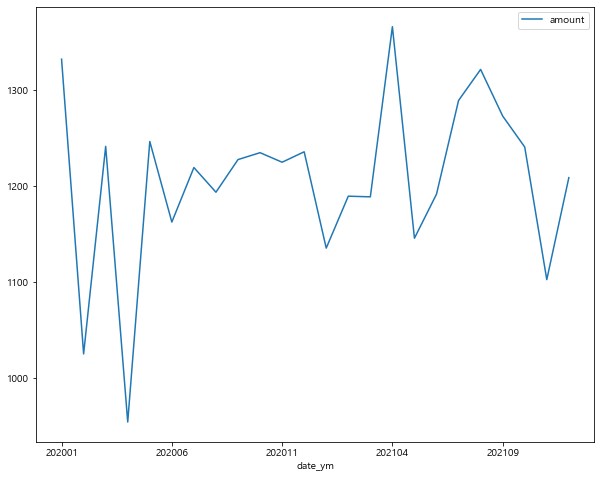

In [202]:
# 월별 평균 매출 그래프

df_yd_am.plot()

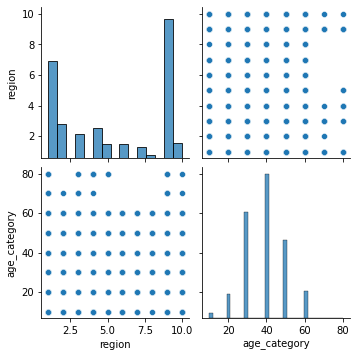

In [54]:
sns.pairplot(df[['region','age_category']])

- 40대를 중심으로 +-10살 분포되어있음

<AxesSubplot:xlabel='region', ylabel='age'>

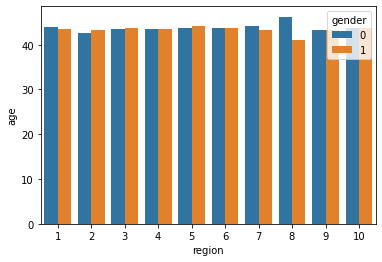

In [55]:
sns.barplot(data=df,x='region',y='age',hue='gender',ci=None)

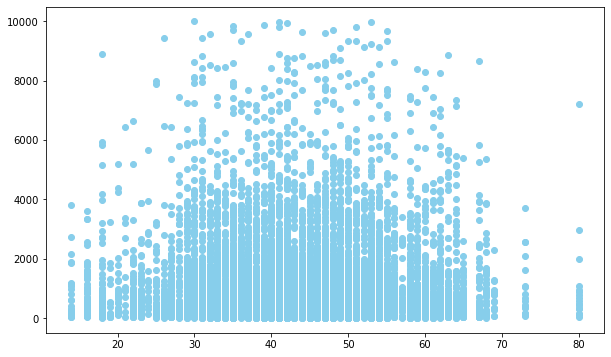

In [58]:
# 연령대 별 매출 추이
x = df.age
y = df.amount
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='skyblue')

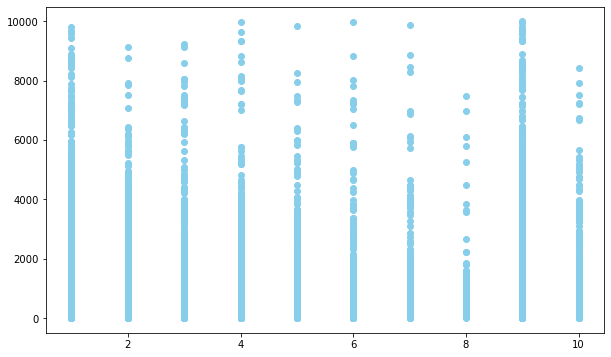

In [59]:
# 지역별 매출 추이
x = df.region
y = df.amount
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='skyblue')

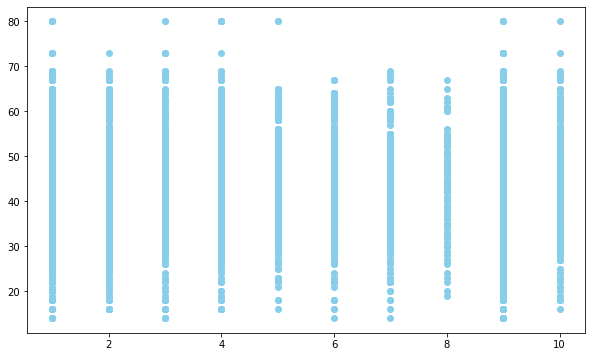

In [60]:
x = df.region
y = df.age
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='skyblue')

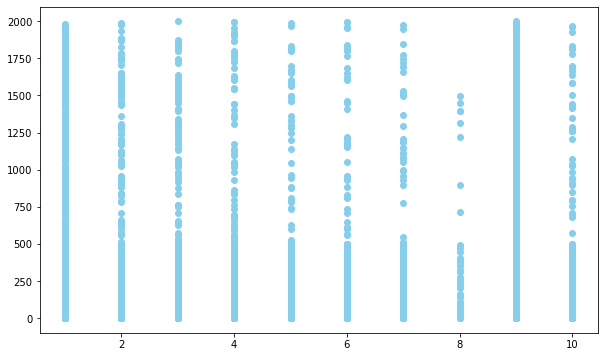

In [61]:
x = df.region
y = df.price
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='skyblue')

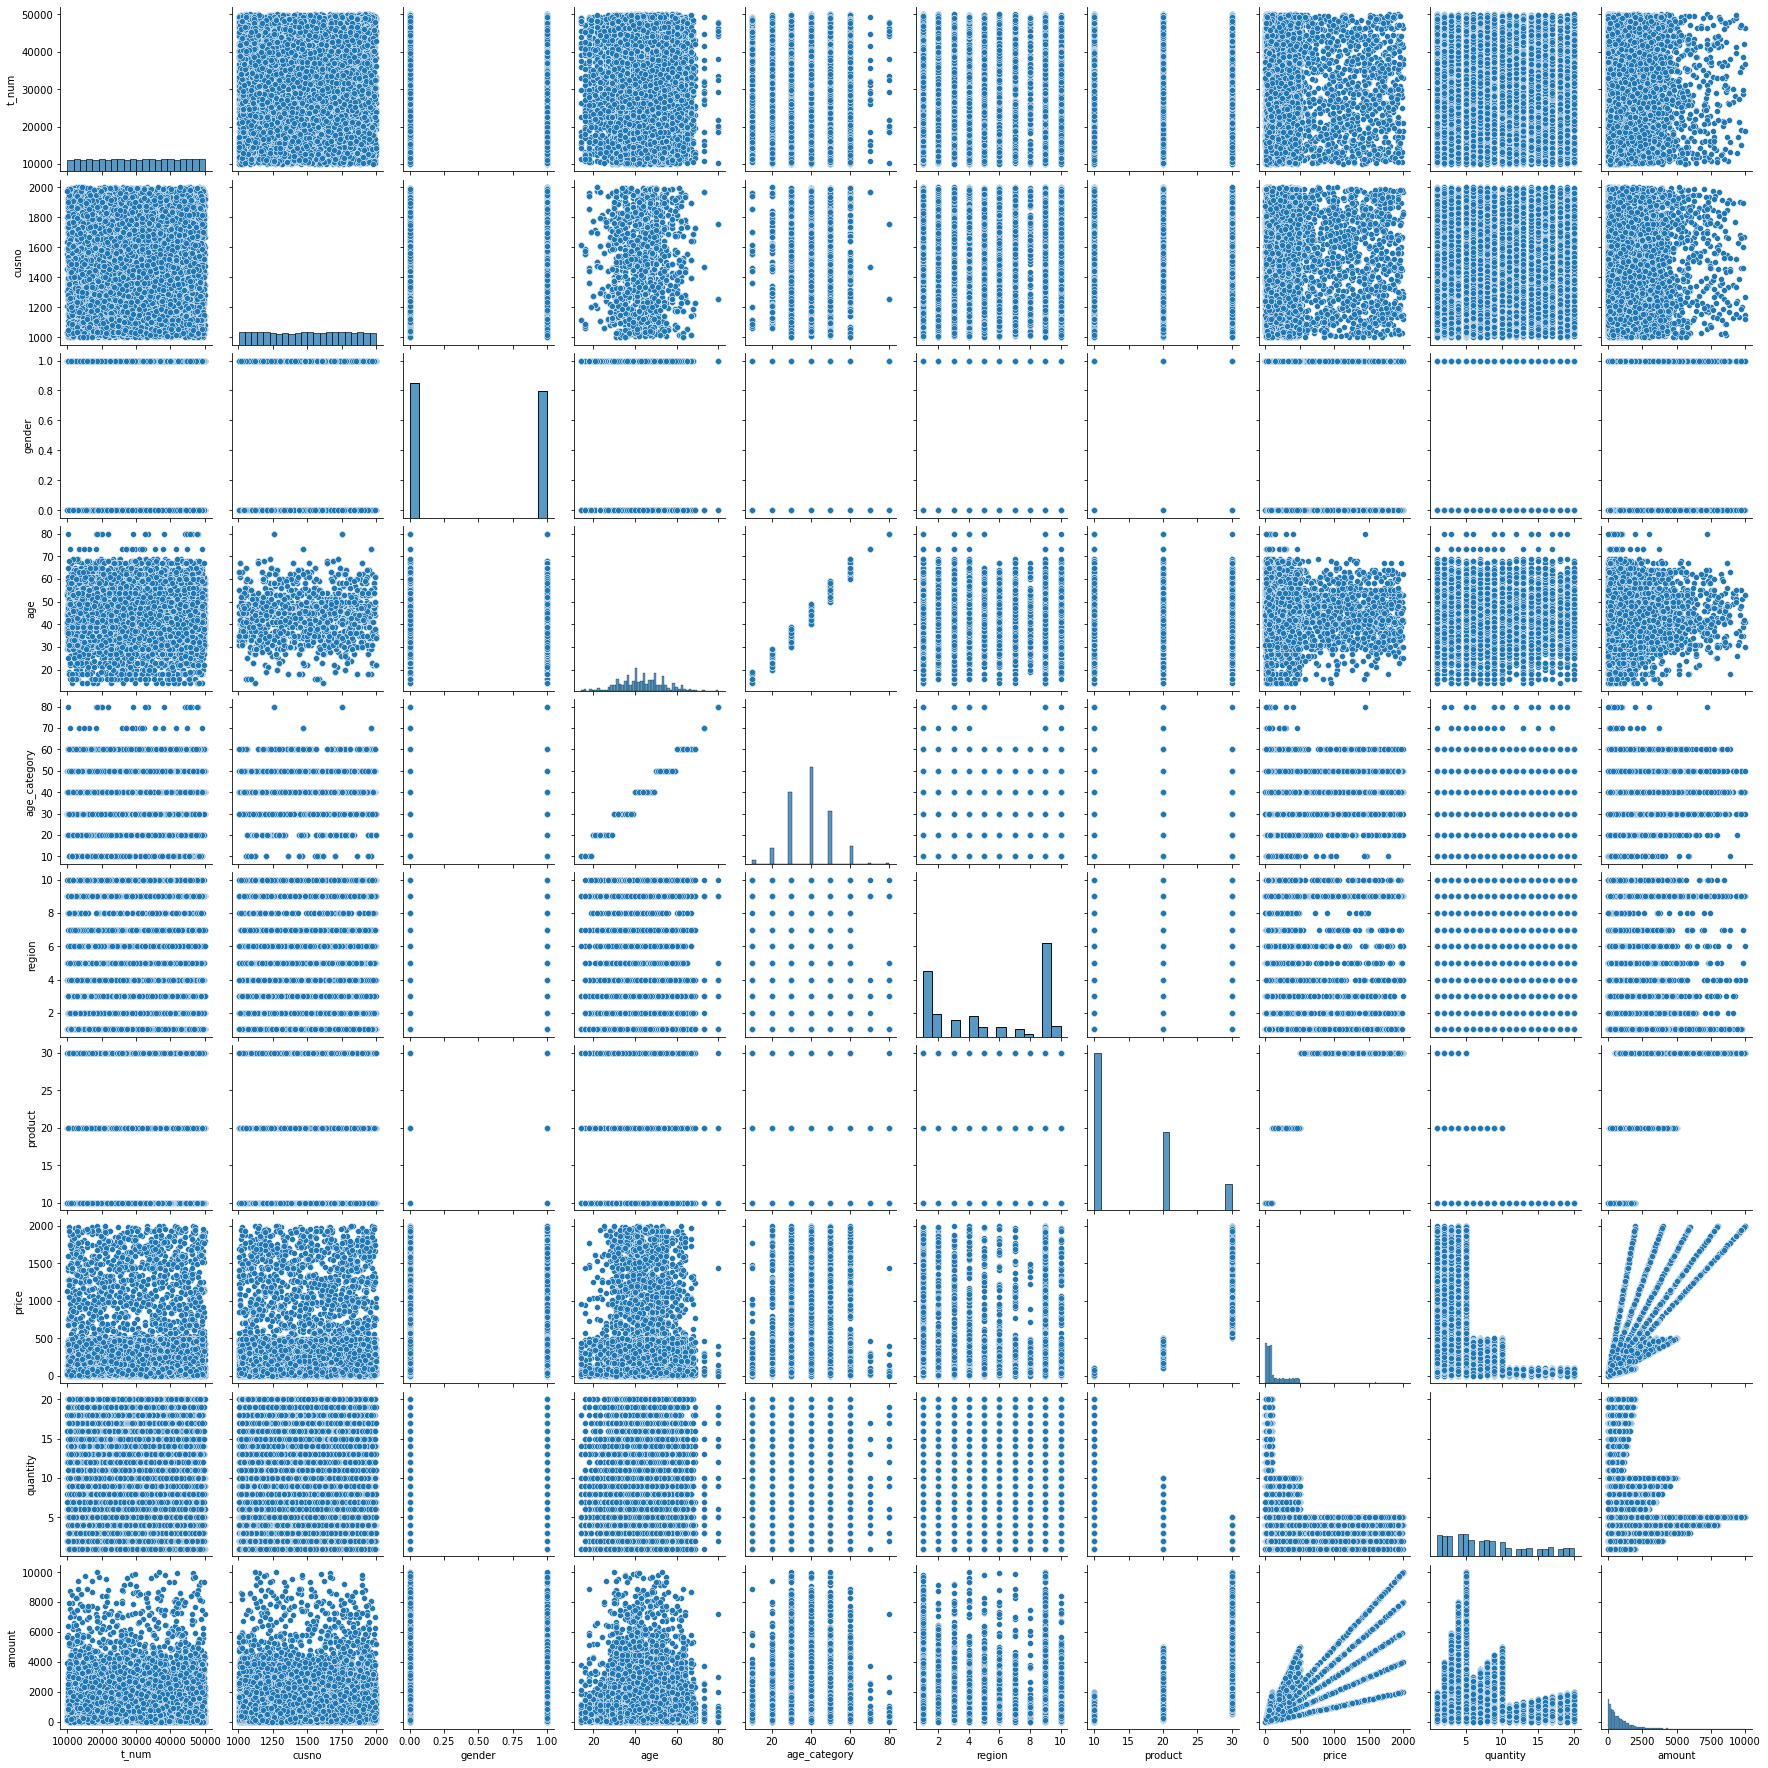

In [62]:
# 전체적인 뷰
sns.pairplot(df,palette='gray')

Text(0.5, 1.0, 'Heatmap of the Dataset')

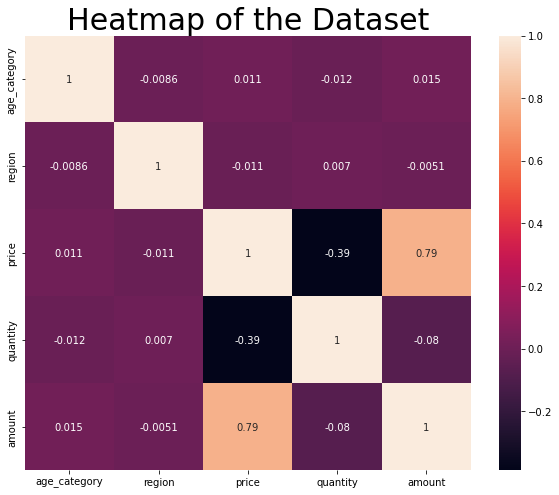

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['age_category','region','price','quantity','amount']].corr(), annot=True)
plt.title('Heatmap of the Dataset', fontsize=30)

C:\Users\lynn5\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


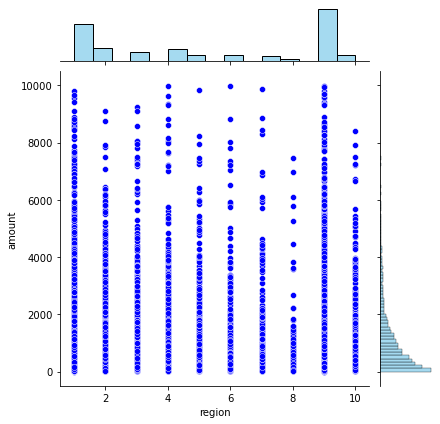

In [64]:
sns.jointplot(df.region, df.amount,
             joint_kws = {'color':'blue'},
             marginal_kws = {"color":"skyblue"})

C:\Users\lynn5\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


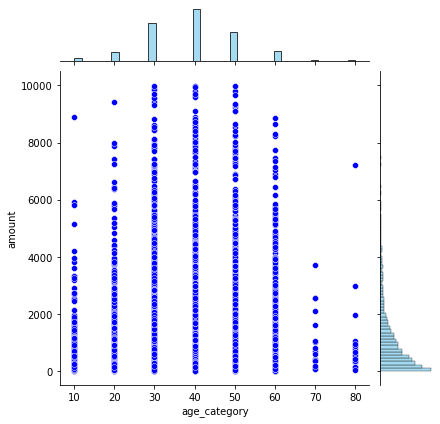

In [65]:
sns.jointplot(df.age_category, df.amount,
             joint_kws = {'color':'blue'},
             marginal_kws = {"color":"skyblue"})

### 데이터 평가

In [231]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

df.to_csv('team6.csv')
rm_df = pd.read_csv('team6.csv')
rm_df = rm_df.drop('Unnamed: 0', axis=1)
rm_df

,t_num,cusno,gender,age,age_category,region,product,price,quantity,amount,date,year,month,day,amount_20,amount_21,sales,date_ym
0,10348,1926,0,68,60,1,10,11,11,121,2020-01-01,2020,2020-01,2020-01-01,121.0,NaN,25443,202001
1,31564,1770,0,61,60,1,30,1889,1,1889,2020-01-01,2020,2020-01,2020-01-01,1889.0,NaN,25443,202001
2,33109,1183,1,47,40,1,10,95,19,1805,2020-01-01,2020,2020-01,2020-01-01,1805.0,NaN,25443,202001
3,22283,1638,1,44,40,1,20,209,10,2090,2020-01-01,2020,2020-01,2020-01-01,2090.0,NaN,25443,202001
4,46238,1346,1,53,50,1,20,337,8,2696,2020-01-01,2020,2020-01,2020-01-01,2696.0,NaN,25443,202001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14583,1212,1,50,50,10,20,200,4,800,2021-12-31,2021,2021-12,2021-12-31,NaN,800.0,25443,202112
9996,31789,1641,1,47,40,10,10,88,20,1760,2021-12-31,2021,2021-12,2021-12-31,NaN,1760.0,25443,202112
9997,28811,1044,0,37,30,9,10,86,18,1548,2021-12-31,2021,2021-12,2021-12-31,NaN,1548.0,25443,202112
9998,23910,1745,0,33,30,9,20,201,3,603,2021-12-31,2021,2021-12,2021-12-31,NaN,603.0,25443,202112


In [221]:
rm_df.shape

(10000, 18)

In [222]:
rm_df.keys()

Index(['t_num', 'cusno', 'gender', 'age', 'age_category', 'region', 'product',
       'price', 'quantity', 'amount', 'date', 'year', 'month', 'day',
       'amount_20', 'amount_21', 'sales', 'date_ym'],
      dtype='object')

In [248]:
### fit() 메서드는 아무 것도 수행하지 않고, predict()는 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 단순한 분류기 생성
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict 메서드는 단순히 Sex 피처가 1이면 0, 아니면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['gender'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1 
        return pred

In [252]:
## 생성된 MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


## 머신러닝에 불필요한 피처 제거
def drop_features(rm_df):
    rm_df.drop(['t_num', 'cusno', 'age', 'product', 'price', 'quantity', 'date', 'year', 'month', 'day', 'amount_20', 'amount_21', 'sales', 'date_ym'], axis=1, inplace=True)
    return rm_df

## Label Encoding 수행
def format_features(rm_df):
    rm_df['age_category'] = df['age_category'].str[:1]
    features = ['age_category', 'gender', 'region']
    for feature in features:
        le = LabelEncoder()
        le.fit(rm_df[feature])
        rm_df[feature] = le.transform(rm_df[feature])
    return rm_df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(rm_df):
    df = drop_features(rm_df)
    df = format_features(rm_df)
    return rm_df

In [253]:
# 타이타닉 데이터 로딩 및 학습 데이터 / 테스트 데이터 분할
team6_df = pd.read_csv('team6.csv')
y_team6_df = team6_df['amount']
X_team6_df = team6_df.drop(['amount'], axis=1)
X_team6_df = transform_features(X_team6_df)
X_train, X_test, y_train, y_test = train_test_split(X_team6_df, y_team6_df, test_size=0.2, random_state=0)

AttributeError: Can only use .str accessor with string values!

In [246]:

print('target값: ', region)
print('target명: ', region)

rm_df3 = rm_df['region'].copy()
rm_df3 ['label'] = rm_df3.target
rm_df3.head(3)

target값:  0       4
1       4
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    2
9998    3
9999    5
Length: 10000, dtype: int32
target명:  0       4
1       4
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    2
9998    3
9999    5
Length: 10000, dtype: int32


AttributeError: 'Series' object has no attribute 'target'

#### data와 target으로 분리
- 필요한 데이터만 추출
- data:X, target:y 로 분리

In [226]:
X = rm_df.drop(['amount_20','amount_21','sales','date_ym','region'], axis=1)
X.head()

,t_num,cusno,gender,age,age_category,region,product,price,quantity,date,year,month,day
0,10348,1926,0,68,60,1,10,11,11,2020-01-01,2020,2020-01,2020-01-01
1,31564,1770,0,61,60,1,30,1889,1,2020-01-01,2020,2020-01,2020-01-01
2,33109,1183,1,47,40,1,10,95,19,2020-01-01,2020,2020-01,2020-01-01
3,22283,1638,1,44,40,1,20,209,10,2020-01-01,2020,2020-01,2020-01-01
4,46238,1346,1,53,50,1,20,337,8,2020-01-01,2020,2020-01,2020-01-01


In [229]:
y = rm_df['region']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: region, dtype: int64

In [242]:
from sklearn.model_selection import train_test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)


ImportError: cannot import name 'train_test' from 'sklearn.model_selection' (C:\Users\lynn5\anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

#### 고객 감소 예측하기

array([ 42,  59, 259, ..., 142, 176,  79], dtype=int64)

## 연습장(부분 실행)

In [32]:
# [지역 region] 지역별 인구 분포 /지역 세팅
region1 = np.random.randint(1,2,size=2522)
region2 = np.random.randint(2,3,size=887)
region3 = np.random.randint(3,4,size=631)
region4 = np.random.randint(4,5,size=784)
region5 = np.random.randint(5,6,size=381)
region6 = np.random.randint(6,7,size=385)
region7 = np.random.randint(7,8,size=297)
region8 = np.random.randint(8,9,size=100)
region9 = np.random.randint(9,10,size=3604)
region10 = np.random.randint(10,11,size=409)

a1 = pd.Series(region1)
a2 = pd.Series(region2)
a3 = pd.Series(region3)
a4 = pd.Series(region4)
a5 = pd.Series(region5)
a6 = pd.Series(region6)
a7 = pd.Series(region7)
a8 = pd.Series(region8)
a9 = pd.Series(region9)
a10 = pd.Series(region10)

region = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10], axis=0,ignore_index=True)
region = region.sample(frac=1).reset_index(drop=True)
region

0        6
1        1
2        4
3        1
4        9
        ..
9995     9
9996     4
9997     3
9998    10
9999     1
Length: 10000, dtype: int32

In [33]:
# [제품 product 저,중,고가]

p10 = np.random.randint(10,11,size=6000)
p20 = np.random.randint(20,21,size=3000)
p30 = np.random.randint(30,31,size=1000)

product10 = pd.Series(p10)
product20 = pd.Series(p20)
product30 = pd.Series(p30)

product= pd.concat([product10,product20,product30],axis=0,ignore_index=True)
product = product.sample(frac=1).reset_index(drop=True)
#df['product'] = pd.concat([product10,product20,product30],axis=0,ignore_index=True)

product

0       10
1       10
2       20
3       10
4       10
        ..
9995    10
9996    10
9997    10
9998    20
9999    10
Length: 10000, dtype: int32

In [34]:
df_tra = pd.DataFrame(columns=['product','price','quantity','amount'])


p10 = np.random.randint(10,11,size=6000)
p20 = np.random.randint(20,21,size=3000)
p30 = np.random.randint(30,31,size=1000)

product10 = pd.Series(p10)
product20 = pd.Series(p20)
product30 = pd.Series(p30)

product = pd.concat([product10,product20,product30],axis=0,ignore_index=True)
df_tra['product'] = product.sample(frac=1).reset_index(drop=True)

price = np.random.uniform(1000,50000,size=10000).round(2)
quantity = np.random.randint(1,100,size=10000)
amount = price*quantity

def price_set(x):
    if x == 10: 
        y = np.random.randint(1,101)
    elif x == 20:
        y = np.random.randint(100,501)
    elif x == 30: 
        y = np.random.randint(500,2001)
    return y

# 구매수량 조정
def quantity_set(x):
    if x == 10: 
        z = np.random.randint(1,21)
    elif x == 20:
        z = np.random.randint(1,11)
    elif x == 30: 
        z = np.random.randint(1,6)
    return z


df_tra['price']=df_tra['product'].apply(price_set)
df_tra['quantity']=df_tra['product'].apply(quantity_set)


#amount 조정

df_tra['amount']=df_tra['price']*df_tra['quantity']

df_tra.head()

,product,price,quantity,amount
0,20,116,8,928
1,20,200,6,1200
2,20,266,3,798
3,20,433,6,2598
4,10,89,6,534


In [35]:
df_tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   product   10000 non-null  int32
 1   price     10000 non-null  int64
 2   quantity  10000 non-null  int64
 3   amount    10000 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 273.6 KB


In [36]:
# [날짜 date 구매한 날짜]
'''1. 월별(시즌) amount 가중치 부여
    - 1~3월 / 신학기 할인 → 매출 증가
    - 5~9월 / 에어컨 → 매출 증가'''

# 20년도 조정
date_list20_1 = list(pd.date_range('2020-01-01','2020-03-31',freq='D'))
date_list20_1 = np.random.choice(date_list20_1,size=3000)
date_list20_1 = pd.Series(date_list20_1)

date_list20_2 = list(pd.date_range('2020-04-01','2020-04-30',freq='D'))
date_list20_2 = np.random.choice(date_list20_2,size=200)
date_list20_2 = pd.Series(date_list20_2)

date_list20_3 = list(pd.date_range('2020-05-01','2020-09-30',freq='D'))
date_list20_3 = np.random.choice(date_list20_3,size=5000)
date_list20_3 = pd.Series(date_list20_3)

date_list20_4 = list(pd.date_range('2020-10-01','2020-12-31',freq='D'))
date_list20_4 = np.random.choice(date_list20_4,size=1800)
date_list20_4 = pd.Series(date_list20_4)

#21년도 조정
date_list21_1 = list(pd.date_range('2021-01-01','2021-03-31',freq='D'))
date_list21_1 = np.random.choice(date_list21_1,size=3000)
date_list21_1 = pd.Series(date_list21_1)

date_list21_2 = list(pd.date_range('2021-04-01','2021-04-30',freq='D'))
date_list21_2 = np.random.choice(date_list21_2,size=200)
date_list21_2 = pd.Series(date_list21_2)

date_list21_3 = list(pd.date_range('2021-05-01','2021-09-30',freq='D'))
date_list21_3 = np.random.choice(date_list21_3,size=5000)
date_list21_3 = pd.Series(date_list21_3)

date_list21_4 = list(pd.date_range('2021-10-01','2021-12-31',freq='D'))
date_list21_4 = np.random.choice(date_list21_4,size=2000)
date_list21_4 = pd.Series(date_list21_4)


df_tra['date'] = pd.concat([date_list20_1,date_list20_2,date_list20_3,date_list20_4,
                 date_list21_1,date_list21_2,date_list21_3,date_list21_4],axis=0,ignore_index=True)

df_tra['date']


0      2020-02-16
1      2020-01-22
2      2020-03-24
3      2020-03-20
4      2020-03-02
          ...    
9995   2020-12-03
9996   2020-11-20
9997   2020-10-12
9998   2020-12-14
9999   2020-11-21
Name: date, Length: 10000, dtype: datetime64[ns]

In [37]:
df_tra['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: date
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


<AxesSubplot:>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


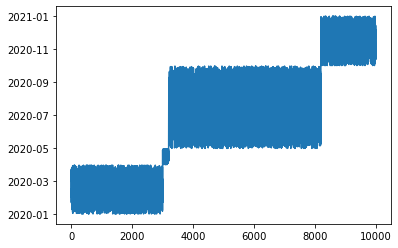

In [38]:
df_tra['date'].plot()